In [9]:
from settings import *

In [10]:
qubits = TriangularLayoutA(m=1, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

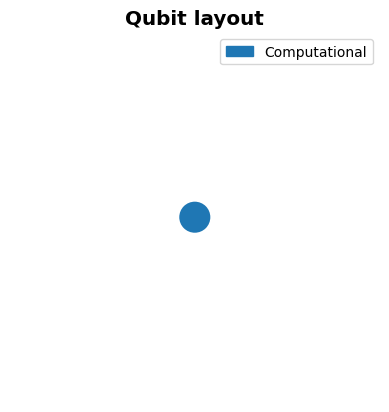

In [11]:
qubits.show_layout()

In [12]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=100, theta_init=np.zeros(circuit.P))

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=63060
Iteration: 0 
            Max gradient term: 5.293955920339377e-18 
            Current gradient: [ 5.29395592e-18 -3.12665425e-04  5.29395592e-18  0.00000000e+00
  5.29395592e-18 -3.12665425e-04  5.29395592e-18  0.00000000e+00
  5.29395592e-18 -3.12665425e-04  5.29395592e-18  0.00000000e+00
  5.29395592e-18 -3.12665425e-04  5.29395592e-18  0.00000000e+00
  5.29395592e-18 -3.12665425e-04  5.29395592e-18  0.00000000e+00] 
            Current error: 1.0730497557054623e-06 
            Current sigma values: (1, 0, 10)


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 10 
            Max gradient term: 0.0 
            Current gradient: [-1.04687811e-08 -2.19263257e-09 -2.39445942e-08  0.00000000e+00
 -2.39445942e-08 -2.61780826e-09 -3.74205231e-08  0.00000000e+00
 -3.74205231e-08 -3.03487075e-09 -5.08965661e-08  0.00000000e+00
 -5.08965661e-08 -3.44381910e-09 -6.43727285e-08  0.00000000e+00
 -6.43727275e-08 -3.84465671e-09 -7.78489978e-08  0.00000000e+00] 
            Current error: 1.0056555885169732e-06 
            Current sigma values: (2, 0, 1.25)
Iteration: 20 
            Max gradient term: 1.6683516706251952e-08 
            Current gradient: [ 1.66835167e-08 -7.77470822e-11  3.20808374e-09  0.00000000e+00
  3.20808472e-09 -5.19677757e-10 -1.02676544e-08  0.00000000e+00
 -1.02676546e-08 -9.41645235e-10 -2.37436936e-08  0.00000000e+00
 -2.37436946e-08 -1.34365251e-09 -3.72200254e-08  0.00000000e+00
 -3.72200243e-08 -1.72569817e-09 -5.06966396e-08  0.00000000e+00] 
            Current error: 1.005655576021953e-06 
            Curre

In [13]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [14]:
theta_opt

array([-2.24718595e-06,  8.61946667e-05, -1.87595961e-06,  0.00000000e+00,
       -1.87595960e-06,  8.62083133e-05, -1.50470605e-06,  0.00000000e+00,
       -1.50470605e-06,  8.62203804e-05, -1.13342750e-06,  0.00000000e+00,
       -1.13342750e-06,  8.62308678e-05, -7.62126166e-07,  0.00000000e+00,
       -7.62126166e-07,  8.62397756e-05, -3.90804273e-07,  0.00000000e+00])

rho_rand_haar: seed=65926


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

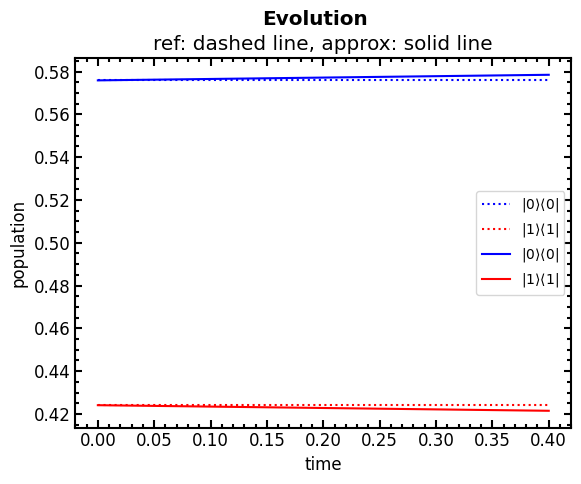

In [24]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.01, N=40, s=system, jump_opers=[])
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

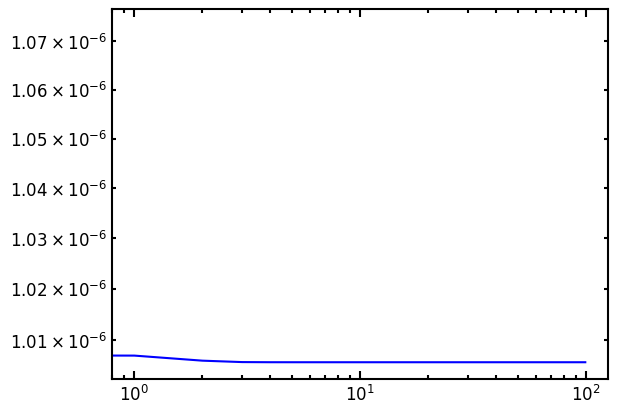

In [16]:
plt.loglog(errors)